
In this section, we explore the cleaned WHO COVID-19 data to uncover patterns, trends, and insights. The goal is to analyze global and regional case distributions, identify most affected countries, and observe temporal changes over time.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Data/WHO_COVID19_cleaned.csv')
df['Date_reported'] = pd.to_datetime(df['Date_reported'])  # Ensure date is in datetime format


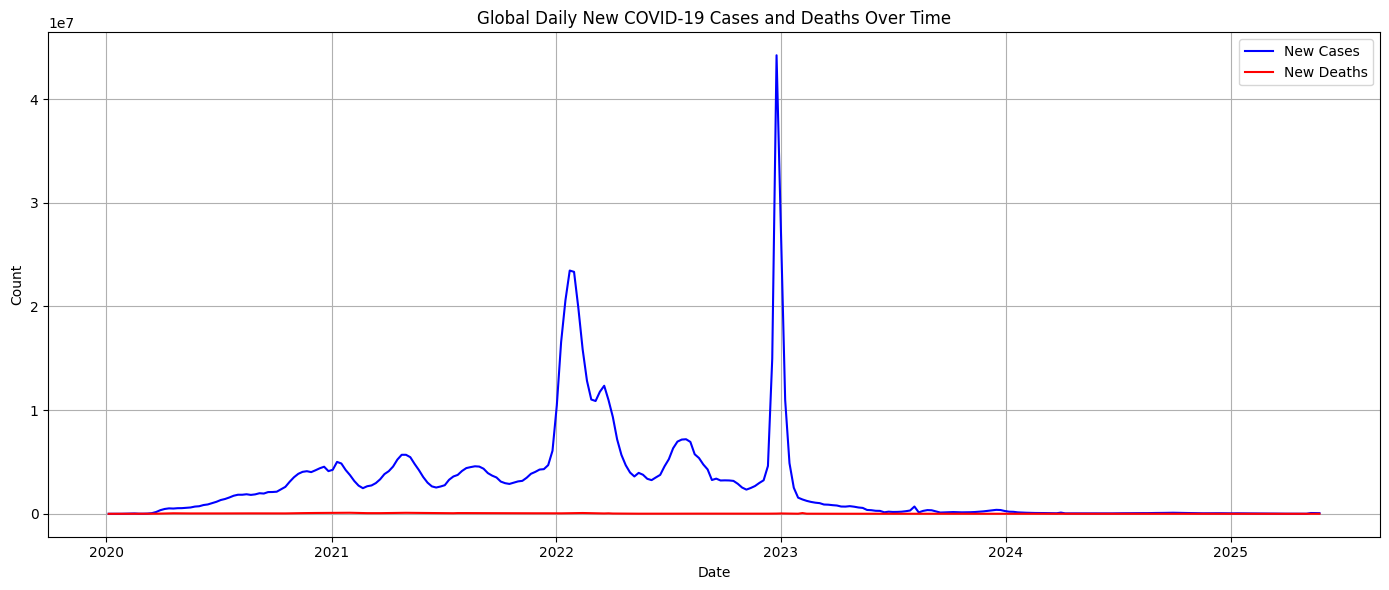

In [38]:
global_trend = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum()

plt.figure(figsize=(14,6))
plt.plot(global_trend.index, global_trend['New_cases'], label='New Cases', color='blue')
plt.plot(global_trend.index, global_trend['New_deaths'], label='New Deaths', color='red')
plt.title('Global Daily New COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
import plotly.express as px

# Prepare the data
global_trend = df.groupby('Date_reported')[['New_cases', 'New_deaths']].sum().reset_index()

# Plot with Plotly
fig = px.line(global_trend,
              x='Date_reported',
              y=['New_cases', 'New_deaths'],
              title='Interactive: Global Daily New COVID-19 Cases and Deaths Over Time',
              labels={'value': 'Count', 'variable': 'Metric'},
              template='plotly_dark')  # Optional: use a styled theme

fig.show()

Global Daily New COVID-19 Cases and Deaths

This line plot shows the global trend of newly reported COVID-19 cases and deaths each day. It helps identify outbreak waves and peak periods throughout the pandemic timeline.

Observations:
- Multiple waves of infection are visible globally.
- Significant peaks occur in early 2021 and again in late 2021–early 2022, likely associated with variants such as Delta and Omicron.
- After mid-2022, there is a noticeable decline in daily reported cases and deaths.



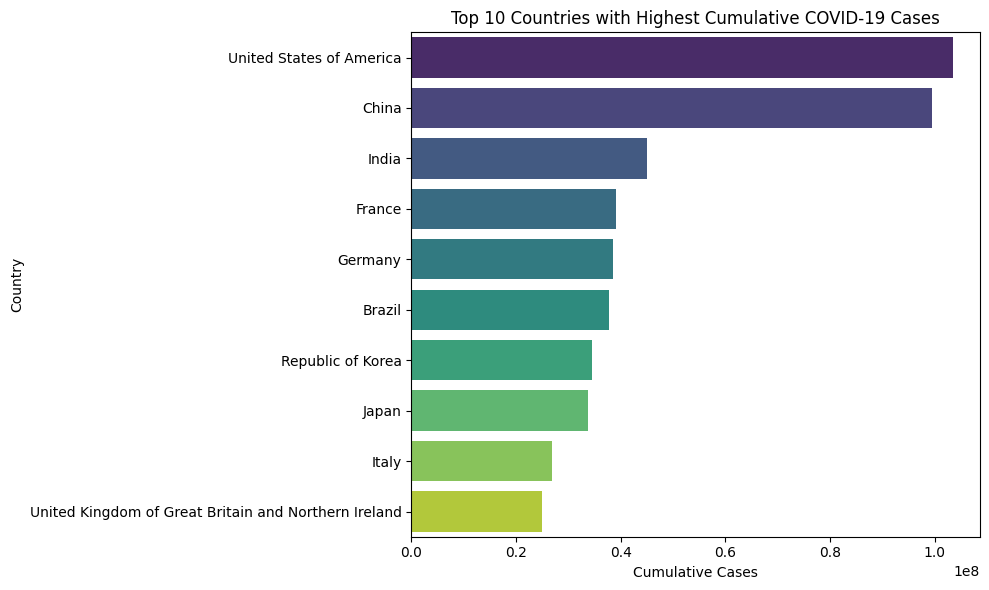

In [40]:
top_countries = df.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,  # Use index as hue
    palette='viridis',
    dodge=False,
    legend=False  # Avoid double legends
)
plt.title('Top 10 Countries with Highest Cumulative COVID-19 Cases')
plt.xlabel('Cumulative Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Top 10 Countries by Cumulative COVID-19 Cases

This bar chart highlights the countries that reported the highest total number of cases throughout the pandemic.

Observations:
- The United States has the highest total cases, followed by India and Brazil.
- Other countries in the top 10 include Russia, France, and the UK.
- This chart emphasizes the global concentration of cases in a few highly populated and/or heavily affected nations.


In [41]:
fig = px.line(df.groupby('Date_reported').sum().reset_index(),
              x='Date_reported', y='New_cases',
              title='Interactive: Global Daily New Cases Over Time')
fig.show()


In [42]:
region_trend = df.groupby(['Date_reported', 'WHO_region'])['New_cases'].sum().reset_index()

fig = px.line(region_trend, x='Date_reported', y='New_cases', color='WHO_region',
              title='Daily New Cases by WHO Region Over Time')
fig.show()


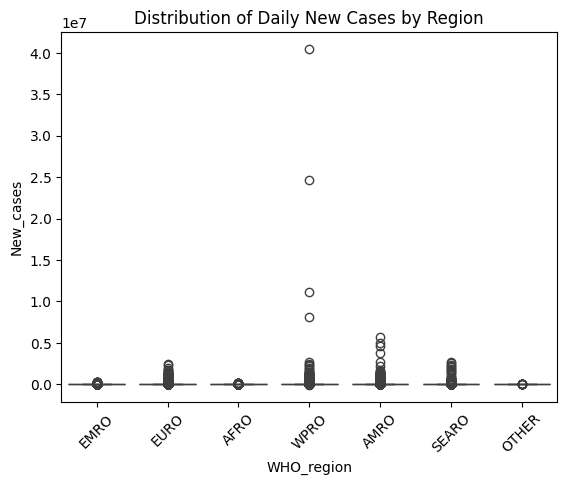

In [43]:
sns.boxplot(x='WHO_region', y='New_cases', data=df)
plt.title('Distribution of Daily New Cases by Region')
plt.xticks(rotation=45)
plt.show()


Daily New COVID-19 Cases by WHO Region (Over Time)

This interactive line plot shows the progression of daily new COVID-19 cases in each WHO region. It reveals how different regions experienced case surges at different times.

Observations:
- The Americas and Europe experienced prolonged waves with multiple peaks.
- Africa and the Western Pacific regions had relatively stable and low daily cases.
- This chart provides a clear comparison of outbreak timelines across regions.


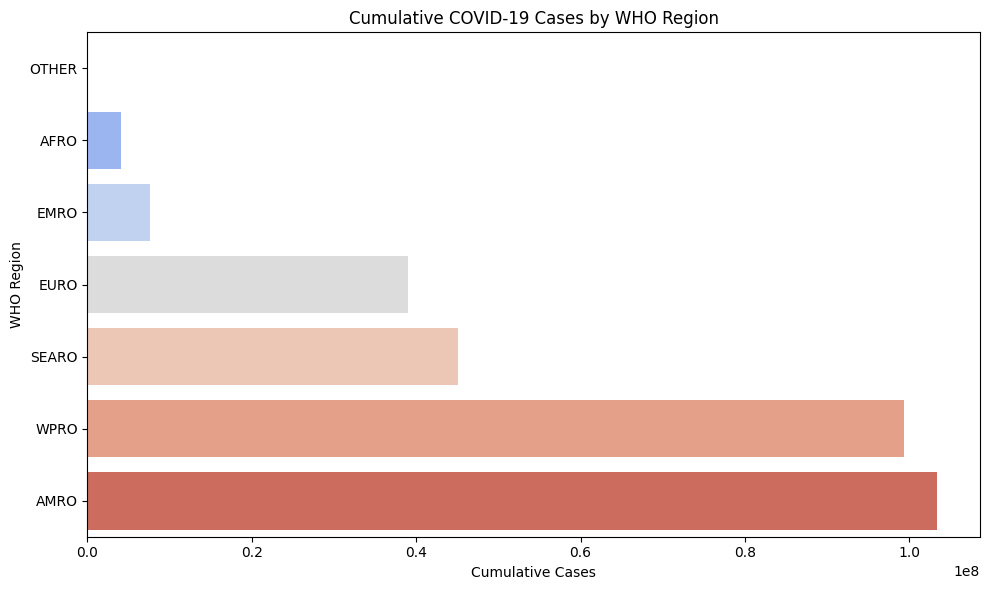

In [46]:
region_cases = df.groupby('WHO_region')['Cumulative_cases'].max().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(
    x=region_cases.values,
    y=region_cases.index,
    hue=region_cases.index,  # Assign hue to match the bar color
    palette='coolwarm',
    legend=False
)
plt.title('Cumulative COVID-19 Cases by WHO Region')
plt.xlabel('Cumulative Cases')
plt.ylabel('WHO Region')
plt.tight_layout()
plt.show()


This bar chart summarizes the total cumulative COVID-19 cases reported across WHO regions.

Observations:
- The Americas reported the highest cumulative cases.
- Europe and South-East Asia follow with significant case loads.
- Africa and the Western Pacific regions had comparatively lower case totals, potentially due to differing testing capacities and reporting practices.

Key Insights
- The USA, India, and Brazil are among the most affected countries in terms of total cases.
- The Americas region consistently had high case counts across all phases of the pandemic.
- Daily case trends reveal multiple waves, often linked to new variants.
- Regional trends indicate varying effectiveness in containment and reporting.